# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*

# Data Validation
The dataset consists of 947 rows and 8 columns. All variables have been validated and necessary changes have been made for better data analysis. Below is the description of all columns along with the steps taken upon them:

**recipe**:

This column has 947 non-missing and unique values, and no cleaning is needed as it matches the description of having numeric values.

**calories, carbohydrate, sugar, protein**:

These columns have 895 non-missing values each, with 52 missing values each. These are numeric columns and have been cleaned by grouping the values by category and imputing with the median. This ensures that outliers and larger values do not impact the imputation process, and median imputation is better suited for the data.

**category**:

Upon reviewing the data, it was observed that the column did not match the description provided and required cleaning. The expected number of unique values in the column was around 10, but 11 values were found in the dataset. The anomalous value was identified as "Chicken Breast", which was replaced with the appropriate value "Chicken" as per the data description.

**servings**:

This column has 6 values as a string, out of which 4 are numeric in nature and 2 are strings. It has no missing values but is not the same as described in the data information, which stated it was a numeric column. For the two string values "['4 as a snack','6 as a snack']", which weren't needed, they were stripped out by checking against the category column that contained the "Lunch/Snacks" category. Also, to ensure the entire column has numeric values, the data type was converted to int.

**high_traffic**:

This column has string values with missing values, same as the description. It was observed that the rows with missing values corresponded to instances where there was no high traffic, and as such, were not labeled. Conversely, those rows with high traffic were appropriately labeled.The NaN values were then removed and named to something of value, such as "Low", since the column only had "High" as a value.

In conclusion, the necessary data validation has been performed on this dataset, and the cleaning and transformation have been done accordingly to make the data more usable for analysis.

In [1]:
#importing the relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import PowerTransformer,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score,KFold,GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay,classification_report,roc_auc_score,roc_curve,f1_score,accuracy_score,RocCurveDisplay,precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
# importing the data
data = pd.read_csv('recipe.csv')

In [3]:
# viewing a sample of the data
data.sample(10)

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
489,490,339.80,2.81,3.03,0.24,Beverages,4,NaN
906,907,194.37,12.17,1.58,3.67,Lunch/Snacks,4,NaN
482,483,920.73,9.91,38.66,0.36,Dessert,4,High
485,486,139.19,20.10,18.40,3.95,Breakfast,4,High
400,401,338.71,59.94,12.26,30.72,Breakfast,4,NaN
388,389,NaN,NaN,NaN,NaN,Lunch/Snacks,4,High
46,47,69.01,39.17,39.54,0.17,Beverages,4,NaN
289,290,223.01,25.99,7.52,11.69,Meat,4,High
676,677,261.88,0.58,12.87,1.76,Beverages,1,NaN
613,614,74.47,30.82,1.86,4.80,Breakfast,2,NaN


In [4]:
# validating the columns of the dataframe
data.columns

Index(['recipe', 'calories', 'carbohydrate', 'sugar', 'protein', 'category',
       'servings', 'high_traffic'],
      dtype='object')

In [5]:
# validating the information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


All values are unique in the recipe index column.

In [6]:
# checking for uniqueness in recipe column
data.recipe.nunique()

947

The output below shows the amount of null values in all the columns.The columns calories,carbohydrate,sugar and protein each have about 52 missing values.The target column also shows about 373 missing values.

In [7]:
# checking for null values
data.isnull().sum()

recipe            0
calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64

Before jumping onto impute the missing values the category and serving column needs to be dealt with for further use and assistance in imputing missing values. 

In [8]:
# counting different categroical values in the column
data.category.value_counts()

Breakfast         106
Chicken Breast     98
Beverages          92
Lunch/Snacks       89
Potato             88
Pork               84
Vegetable          83
Dessert            83
Meat               79
Chicken            74
One Dish Meal      71
Name: category, dtype: int64

In [9]:
#validating unique values of the category column
a = list(data.category.unique())
# category values from the data
a

['Pork',
 'Potato',
 'Breakfast',
 'Beverages',
 'One Dish Meal',
 'Chicken Breast',
 'Lunch/Snacks',
 'Chicken',
 'Vegetable',
 'Meat',
 'Dessert']

In [10]:
# category values taken from the data information provided
b = ['Lunch/Snacks', 'Beverages', 'Potato','Vegetable', 'Meat', 'Chicken', 'Pork', 'Dessert', 'Breakfast', 'One Dish Meal']
b

['Lunch/Snacks',
 'Beverages',
 'Potato',
 'Vegetable',
 'Meat',
 'Chicken',
 'Pork',
 'Dessert',
 'Breakfast',
 'One Dish Meal']

Upon conducting a comparison between the data and the information provided, it was discovered that the column contained 11 unique values instead of the expected 10. This anomaly was identified as the odd value.

In [11]:
# Using set() method to get the difference
diff = list(set(a) - set(b))

print(diff)


['Chicken Breast']


In [12]:
# this code will replace all occurrences of "Chicken Breast" with "Chicken" in the "category" column
data['category'] = data['category'].replace('Chicken Breast', 'Chicken')

In [13]:
# validating unique values of the category column
a = list(data.category.unique())
print(a)
print(data.category.nunique())


['Pork', 'Potato', 'Breakfast', 'Beverages', 'One Dish Meal', 'Chicken', 'Lunch/Snacks', 'Vegetable', 'Meat', 'Dessert']
10


In [14]:
data.category.value_counts()

Chicken          172
Breakfast        106
Beverages         92
Lunch/Snacks      89
Potato            88
Pork              84
Vegetable         83
Dessert           83
Meat              79
One Dish Meal     71
Name: category, dtype: int64

The servings column has been found to have different data type and a few irregular values according to the data information which has to be changed to numeric data type and correcting the irregular values.

In [15]:
# validating servings column by checking different values it holds
data.servings.value_counts()

4               389
6               197
2               183
1               175
4 as a snack      2
6 as a snack      1
Name: servings, dtype: int64

In [16]:
# validating for unique values of servings column
data.servings.unique()

array(['6', '4', '1', '2', '4 as a snack', '6 as a snack'], dtype=object)

In [17]:
# validating servings against the category column and checking the need for the two string values in a numeric column
data[(data['servings']=='4 as a snack')|(data['servings']=='6 as a snack')]

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
451,452,1542.53,14.73,5.71,29.92,Lunch/Snacks,4 as a snack,High
548,549,1440.69,30.59,5.78,30.63,Lunch/Snacks,6 as a snack,High
735,736,513.75,65.87,18.63,18.39,Lunch/Snacks,4 as a snack,NaN


In [18]:
# splitting the column to keep only the numeric value and converting the data type to integer
data['servings'] = data['servings'].str.split(' ').str[0].astype(int)

In [19]:
# validating for unique values of servings column
data.servings.unique()

array([6, 4, 1, 2])

Imputing missing values using category and servings column.

In [20]:
# using groupby to view missing values by category adn servings
nulls = data.groupby(['category','servings']).apply(lambda x: x.isnull().sum())
nulls

recipe  calories  ...  servings  high_traffic
category      servings                    ...                        
Beverages     1              0         0  ...         0            19
              2              0         0  ...         0            16
              4              0         0  ...         0            33
              6              0         0  ...         0            19
Breakfast     1              0         0  ...         0            17
              2              0         0  ...         0            14
              4              0         0  ...         0            32
              6              0         0  ...         0            10
Chicken       1              0         1  ...         0            18
              2              0         1  ...         0            18
              4              0         3  ...         0            47
              6              0         4  ...         0            16
Dessert       1              0         1  ...         0             7
              2              0         2  ...         0             6
              4              0         2  ...         0             9
              6              0         1  ...         0             8
Lunch/Snacks  1              0         0  ...         0             2
              2              0         0  ...         0             9
              4              0         5  ...         0            13
              6              0         2  ...         0             8
Meat          1              0         1  ...         0             2
              2              0         2  ...         0             5
              4              0         2  ...         0             8
              6              0         0  ...         0             5
One Dish Meal 1              0         0  ...         0             3
              2              0         1  ...         0             8
              4              0         3  ...         0             7
              6              0         0  ...         0             1
Pork          1              0         1  ...         0             1
              2              0         0  ...         0             2
              4              0         4  ...         0             3
              6              0         6  ...         0             1
Potato        1              0         1  ...         0             3
              2              0         2  ...         0             0
              4              0         2  ...         0             1
              6              0         0  ...         0             1
Vegetable     1              0         1  ...         0             0
              2              0         1  ...         0             0
              4              0         3  ...         0             1
              6              0         0  ...         0             0

[40 rows x 8 columns]

The following code imputes the null values in numeric column of calories,carbohydrate,sugar and protein.

In [21]:
# using groupby with apply wrapping up a lambda function that fills null values to median
df = data.groupby(['category','servings']).apply(lambda x: x.fillna(x.median(numeric_only=True)))
df.sample(5)

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
315,316,132.29,50.28,1.88,22.89,Breakfast,4,NaN
33,34,497.17,1.47,1.51,2.97,Lunch/Snacks,6,High
578,579,580.33,22.17,3.77,9.22,Potato,4,High
577,578,23.45,17.98,7.10,9.73,Potato,2,High
358,359,231.20,15.18,6.96,70.75,Chicken,1,High


Here we can see the missing null values have been dealt with for the 4 numeric columns.

In [22]:
# validating that there are no missing values now
df.isnull().sum()

recipe            0
calories          0
carbohydrate      0
sugar             0
protein           0
category          0
servings          0
high_traffic    373
dtype: int64

We conducted validation on the target column, which was found to have 373 missing values. It was observed that the rows with missing values corresponded to instances where there was no high traffic, and as such, were not labeled. Conversely, those rows with high traffic were appropriately labeled.

In [23]:
# validating high_traffic column by checking different values it holds
df['high_traffic'].value_counts()

High    574
Name: high_traffic, dtype: int64

In [24]:
# checking unique values of the column
df.high_traffic.unique()

array(['High', nan], dtype=object)

In [25]:
# filling NaN values of the high_traffic column with "Low"
df['high_traffic'] = df['high_traffic'].fillna('Low')

In [26]:
# checking for duplicated rows
df[df.duplicated()]

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic


We can see the data now matches the description of the data information provided.

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      947 non-null    float64
 2   carbohydrate  947 non-null    float64
 3   sugar         947 non-null    float64
 4   protein       947 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    int64  
 7   high_traffic  947 non-null    object 
dtypes: float64(4), int64(2), object(2)
memory usage: 98.9+ KB


In [28]:
#viewing the dataframe rows
df.sample(10)

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
679,680,178.95,22.59,4.04,7.04,One Dish Meal,2,High
652,653,0.54,30.59,10.45,0.36,Beverages,6,High
794,795,481.51,5.99,5.43,28.51,Meat,4,High
352,353,781.15,3.91,0.39,21.41,Pork,4,High
575,576,128.30,210.77,112.24,13.02,Dessert,4,Low
184,185,62.59,23.96,6.25,30.83,One Dish Meal,6,Low
463,464,189.27,9.54,6.47,0.34,Beverages,6,Low
43,44,262.12,17.46,0.33,87.05,Chicken,4,Low
745,746,129.07,37.30,2.09,31.57,Pork,2,High
252,253,44.02,6.95,1.23,2.37,Vegetable,4,High


In [29]:
# using describe method to view and analyze various statistics
df.describe()

,recipe,calories,carbohydrate,sugar,protein,servings
count,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000
mean,474.000000,432.100676,34.456932,8.907666,23.961061,3.477297
std,273.519652,441.604401,42.898399,14.395536,35.491916,1.732741
min,1.000000,0.140000,0.030000,0.010000,0.000000,1.000000
25%,237.500000,113.905000,9.135000,1.795000,3.425000,2.000000
50%,474.000000,299.320000,21.480000,4.460000,11.200000,4.000000
75%,710.500000,576.635000,43.230000,9.565000,30.655000,4.000000
max,947.000000,3633.160000,530.420000,148.750000,363.360000,6.000000


# Exploratory Data Analysis and Feature Engineering
This section presents an analysis of a recipe dataset with the objective of identifying patterns or relationships between nutrient variables and website traffic generated by recipes. 

**Target Variable**:
The dataset's target variable is "high_traffic", which is a binary column with two values, "High" and "Low". The following visualization displays the count of each value. It is evident that the "High" value has a higher count than "Low", indicating that the majority of the recipes attract high website traffic.

**Recipe Categories**:
The visualizations displays the distribution of recipe counts by category, categorized by high and low traffic. The x-axis represents the various recipe categories, while the y-axis indicates the recipe count. The bars are grouped by high and low traffic, distinguished by different colors. It is evident that the Beverages category attracts the least amount of traffic, while Pork, Potato, Vegetables, and Meat categories stand out with high traffic impressions. Additionally, we can observe that Chicken category recipes are the most frequently posted on the website, followed by Breakfast and Beverages.

**Nutrient Variables**:
Plots were created to analyze the relationship between nutrient variables and the target variable. The scatter plot matrix did not reveal any significant patterns, while the correlation matrix showed little to no correlation. Violinplots and histograms were used to detect data range, outliers, and skewness,which showed the need for scaling or log transformation.We saw that there were outliers but since the dataset was too small,removing outliers should have resulted in loss of valuable information.

**Serving Size**:
It was important to analyze the relationship between the servings and the target variable. The first plot shows that recipes serving four people attract the highest traffic, while single serving recipes have the least impressions. The second plot displays the relationship between servings and category, revealing that four is the most targeted serving size across all categories, while other serving sizes have varying levels of popularity.

**Additional Features**:
Three new attributes have been incorporated in the dataset to enhance the predictive power of the models ,"healthiness" that presents the aggregate nutritional value and another that separates recipes into different meal types as "meal_type".Another one depicts the High-Low traffic ratio amongst categories.A barplot is presented below, depicting the distribution  with respect to the high_traffic column.The plots shows that if it is a dinner meal type it will  definitely attract high traffic compared to others.On the other hand another plot below shows High-Low Traffic Ratios by category where we can see that Vegetable's category stand out with the highest ratio and which guarantees high traffic.Histogram for healthiness shows that it needs scaling. New features such as meal_type, healthiness and traffic_ratios were created based on the recipe's nutritional profile and categorization. These features were found to have a positive impact on the model's performance, resulting in better scores.Other features were also tested but no improvement in accuracy and other metrics was recorded.


### Target variable - high_traffic:
The target variable for the dataset is  "high_traffic" which is based upon two values of "High" and "Low" which can be described as a binary column. In the visualization below we see the counts of the two values. We clearly see that the value "High"  have more counts than "Low", which means most of the recipes attract high website traffic.

In [30]:
# create a count plot
fig = px.histogram(df, x='high_traffic', color_discrete_sequence=['#6cff00'])
# update the plot layout
fig.update_layout(title='High Traffic Count',
                  xaxis_title='High Traffic',
                  yaxis_title='Count')
# show the plot
fig.show()

### High Traffic by Category
The visualization below shows the distribution of the number of recipes by category, colored by high and low traffic. The x-axis shows the different recipe categories, while the y-axis displays the count of recipes. The bars are grouped by high and low traffic, indicated by different colors.It can be seen that the Beverages category generates the most amount low traffic while Pork,Potato,Vegetables and Meat stand out with high traffic impressions.

In [31]:
# create a plot
fig = px.histogram(df, x='category', color='high_traffic', 
                   barmode='group', title='Counts of High and Low Traffic by Category')
# update the layout
fig.update_layout(xaxis_title='Category', yaxis_title='Count')
# show the plot
fig.show()

### Category Frequency
From the chart below we can show that recipes from the Chicken category is posted mostly on the website with Breakfast and Beverages following it.

In [32]:
# create a plot
fig = px.histogram(df, x='category', title='Frequency of Recipe Categories')
# update layout
fig.update_layout(xaxis_title='Category', yaxis_title='Frequency',xaxis = {"categoryorder":"total ascending"})
# update color
fig.update_traces(marker_color='#1bbbfc')
# show the plot
fig.show()

### Scatter Matrix
Below is a scatter plot matrix to visualize the relationship between four nutritional variables (calories, carbohydrate, sugar, protein) for recipes in different categories. Each plot shows the relationship between two variables and the plots are colored by category. The purpose of the plot is to identify any patterns or trends between the nutritional variables and to compare them across different recipe categories.We can see that the visualization does not interpret any important relationship.

In [33]:
# create a scatter matrix
fig = px.scatter_matrix(
    df,
    dimensions=["calories", "carbohydrate", "sugar", "protein"],
    color="category",
    title="Scatter Plot Matrix of Recipe Nutritional Information"
)
# show the figure
fig.show()

### Heatmap
A correlation matrix is used here to make a heatmap to show the relationship between nutrient variables.
It can be seen that there is very little to low correlation considering the annotated correlation values.Only protein and calories standout a little.

In [34]:
# Correlation
corr = df[['calories', 'carbohydrate', 'sugar', 'protein']].corr()
# Mask to matrix
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# create the plot
df_corr_viz = corr.mask(mask)
fig = px.imshow(df_corr_viz, text_auto=True,title='Correlation Heatmap of Nutrient Variables')
# Customize layout
fig.update_layout(width=600, height=600,
                  xaxis_title='Nutrient Variables',
                  yaxis_title='Nutrient Variables',
                  coloraxis_colorbar=dict(title='Correlation'))
fig.show()

### Violinplots
Below we make four violinplots to interpret relationship between the target variable and nutrient variables.
to detect the data range and outliers.We can see the distribution of data and outliers.We see that there are outliers but since the dataset is too small,removing outliers may result in a loss of valuable information.

In [35]:
# create subplots
fig = make_subplots(rows=2, cols=2, subplot_titles=("Calories", "Carbohydrate", "Sugar", "Protein"))

# create boxplots for each nutrient variable
fig.add_trace(go.Violin(x=df["high_traffic"], y=df["calories"], name="Calories"), row=1, col=1)
fig.add_trace(go.Violin(x=df["high_traffic"], y=df["carbohydrate"], name="Carbohydrate"), row=1, col=2)
fig.add_trace(go.Violin(x=df["high_traffic"], y=df["sugar"], name="Sugar"), row=2, col=1)
fig.add_trace(go.Violin(x=df["high_traffic"], y=df["protein"], name="Protein"), row=2, col=2)

# set layout
fig.update_layout(height=1000, width=1000, title="Boxplots of Nutrient Variables by High Traffic")

# display plot
fig.show()


### Distributions
Histograms were generated to represent the distribution of nutrient variables, revealing a right-skewed distribution in the data. As a result, log transformation or scaling may be required to address the skewness.

In [36]:
# create subplots with 2 rows and 2 columns
fig = make_subplots(rows=2, cols=2, subplot_titles=("Calories", "Carbohydrate", "Sugar", "Protein"))

# create histograms for each nutrient variable
fig.add_trace(go.Histogram(x=df["calories"], nbinsx=30, name="Calories"), row=1, col=1)
fig.add_trace(go.Histogram(x=df["carbohydrate"], nbinsx=30, name="Carbohydrate"), row=1, col=2)
fig.add_trace(go.Histogram(x=df["sugar"], nbinsx=30, name="Sugar"), row=2, col=1)
fig.add_trace(go.Histogram(x=df["protein"], nbinsx=30, name="Protein"), row=2, col=2)

# update layout
fig.update_layout(title="Distribution of Nutrient Variables")

# show plot
fig.show()


### Servings Pie Chart
A Pie-Chart below shows the proportions of the servings column which shows that serving "4" has most of the proportion.Recipes of servings size "4" are posted more on the website.

In [37]:
# create pie chart of servings column
fig = px.pie(df, names='servings')
# update the plot
fig.update_layout(title_text='Pie Chart of Servings')
# display plot
fig.show()

### High Traffic by Servings
As part of our analysis, we conducted an investigation into the relationship between the number of servings and the target variable. To visualize this relationship, we created a plot which reveals that recipes designed to serve four people generate the highest traffic, while single serving recipes tend to have the lowest engagement.

In [38]:
# create a plot
fig = px.histogram(df, x='servings', color='high_traffic', 
                   barmode='group', title='Counts of High and Low Traffic by Servings')
# update layout
fig.update_layout(xaxis_title='Servings', yaxis_title='Count')
# show the plot
fig.show()

### Servings and Category
Another plot that shows the relationship between servings and category column,which shows 4 is the most number of servings targeted in every category while other servings values show different numbers.

In [39]:
#create a plot
fig = px.histogram(df, x='category', color='servings', 
                   barmode='group', title='Counts of Servings by Category')
#update the layout
fig.update_layout(xaxis_title='Category', yaxis_title='Count')
#show the plot
fig.show()

### Traffic Ratio
A new feature representing ratio between high to low traffic between categories has been created below.

In [40]:
# Group the data by category and count the number of high and low traffic recipes in each category
traffic_counts = df.groupby(['category', 'high_traffic'])['recipe'].count().unstack()

# Calculate the ratio of high to low traffic recipes for each category
traffic_ratios = traffic_counts['High'] / traffic_counts['Low']

# Create a new column for traffic ratios in the recipe dataframe
df['traffic_ratio'] = df['category'].map(traffic_ratios)


The bar plot below shows High-Low Traffic Ratios by category.We can see here that Vegetable's category stand out and a vegetable category guarantees high traffic.

In [41]:
# Create a bar chart of the traffic ratios by category
fig = go.Figure()
fig.add_trace(go.Bar(
    x=traffic_ratios.index,
    y=traffic_ratios.values,
    marker_color='blue',
))
# update the layout
fig.update_layout(
    title='Traffic Ratios by Category',
    xaxis_title='Category',
    yaxis_title='Traffic Ratio',
    font=dict(
        family="Arial, sans-serif",
        size=12,
    )
)
# show the plot
fig.show()

### Meal Type
Another feature depicting recipe categories as meal type has been created.

In [42]:
# create a dictionary to map recipe categories to meal types
category_to_meal = {'Pork': 'dinner', 
                    'Potato': 'dinner', 
                    'Breakfast': 'breakfast', 
                    'Beverages': 'beverage', 
                    'One Dish Meal': 'dinner', 
                    'Lunch/Snacks': 'lunch', 
                    'Chicken': 'dinner', 
                    'Vegetable': 'dinner', 
                    'Meat': 'dinner',
                    'Dessert': 'dessert'}

# map the recipe categories to meal types and create a new column in the DataFrame
df['meal_type'] = df['category'].map(category_to_meal)


The plot has been made to show that if it is a "dinner" meal type it will definitely attract high traffic.

In [43]:
#create a plot
fig = px.histogram(df, x='meal_type', color='high_traffic', 
                   barmode='group', title='Counts of Meal type by High Traffic')
#update the layout
fig.update_layout(xaxis_title='Category', yaxis_title='Count')
#show the plot
fig.show()

### Healthiness
We can use the USDA Dietary Guidelines for Americans, which recommends a diet that includes a variety of nutrient-dense foods while limiting added sugars, saturated fats, and sodium. Based on these guidelines, we can create a formula that takes into account the amounts of calories, carbohydrates, sugar, and protein in a recipe and assigns a score that indicates how healthy the recipe is.

- healthiness = (calories * 0.3) + (carbohydrate * 0.1) + (sugar * 0.2) + (protein * 0.4)

This formula assigns weights to each nutrient based on their importance to a healthy diet. Calories, carbohydrates, and sugar are given lower weights, while protein is given a higher weight since it is important for muscle growth and repair.

In [44]:
# create a healthiness column according to usda guidelines
df['healthiness'] = (df['calories'] * 0.3) + (df['carbohydrate'] * 0.1) + (df['sugar'] * 0.2) + (df['protein'] * 0.4)

We create a histogram to see the distribution for the healthiness column.

In [45]:
# create a plot
fig = px.histogram(df, x='healthiness')
# show the plot
fig.show()

In [46]:
df.sample(5)

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic,traffic_ratio,meal_type,healthiness
872,873,230.27,9.26,0.43,56.80,One Dish Meal,6,High,2.736842,dinner,92.813
783,784,529.26,7.54,6.94,25.21,Meat,4,High,2.950000,dinner,171.004
243,244,653.90,111.80,5.04,0.36,Potato,6,High,16.600000,dinner,208.502
589,590,801.72,40.78,4.82,44.03,Meat,6,High,2.950000,dinner,263.170
857,858,113.31,11.50,1.73,11.60,Vegetable,2,High,82.000000,dinner,40.129


# Model Fitting and Evaluation
This section presents an analysis of a binary classification problem in machine learning, specifically predicting whether website traffic will be high for a particular recipe or not. The goal is to correctly predict high traffic for a recipe more than 80% of the time.

To achieve this, two models were selected for comparison: Logistic Regression and Random Forest Classifier. Logistic Regression was chosen because it is well-suited for binary classification tasks, while Random Forest Classifier was chosen because it is an ensemble algorithm can handle non-linear relationships between features and the target variable, and is easy to interpret.

The evaluation metric chosen for this problem is Accuracy and F1-Score,however ROC-AUC score will also be used to evaluate the model and select the best one. Accuracy measures the proportion of correctly classified instances, while F1-score takes into account both precision and recall to evaluate the model's performance.ROC AUC (Receiver Operating Characteristic Area Under the Curve) score is a measure of the overall performance of a classification model. It is a commonly used evaluation metric in binary classification problems.

In order to prepare our data for machine learning algorithms, we took several steps. First, we dropped the recipe column since it was not relevant for our analysis. Then, we normalized the nutrient variables and other columns to ensure they were on a similar scale. Next, we used one-hot encoding to convert the categorical variables servings, category, meal_type, and high_traffic into numeric format. Finally, we split the data into a training set and a test set using stratification to ensure that the proportion of high-traffic recipes was the same in both sets,plus using statification ensured good results. These steps ensured that our data was ready for use in a machine learning model.

Based on our analysis, it was determined that Logistic Regression performed better than Random Forest Classifier in terms of precision, accuracy, f1_score and roc-auc score. Therefore, we utilized both algorithms for hyperparameter tuning. However, the results of the tuning process did not indicate a significant improvement in precision and accuracy for the Logistic Regression model. The performance of Random Forest Classifier did show improvement, although it remained comparable to that of the Logistic Regression model.

**Preparing the data for modelling**:

- Dropping recipe column
- Normalizing the nutrient variables and healthiness columns.
- Label Encoding and One Hot Encoding traffic_ratio column.
- One-Hot encoding the servings,category,meal_type and high_traffic columns
- Splitting the data into a training set and a test set and using stratification.

In [47]:
# Drop the recipe Id column
df.drop(columns='recipe',inplace=True)

In [48]:
# create an instance of PowerTransformer
scaler = PowerTransformer()

# create a list of nutrient variables
nutrient_vars = ['calories','carbohydrate','sugar','protein','healthiness']

# apply scaling and normalization to nutrient columns
df[nutrient_vars] = scaler.fit_transform(df[nutrient_vars])

In [49]:
# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the traffic ratio column
df['traffic_ratio'] = le.fit_transform(df['traffic_ratio'])


In [50]:
# one-hot encode category column
df = pd.get_dummies(df, columns=['category'], prefix='cat')

# one-hot encode servings column
df = pd.get_dummies(df, columns=['servings'], prefix='serv')

# one-hot encode high_traffic column
df = pd.get_dummies(df, columns=['high_traffic'],prefix='ht')

# one-hot encode meal_type column
df = pd.get_dummies(df, columns=['meal_type'],prefix='mt')

# one-hot encode traffic ratio column
df = pd.get_dummies(df, columns=['traffic_ratio'],prefix='tr')

df.head()

,calories,carbohydrate,sugar,protein,healthiness,cat_Beverages,cat_Breakfast,cat_Chicken,cat_Dessert,cat_Lunch/Snacks,cat_Meat,cat_One Dish Meal,cat_Pork,cat_Potato,cat_Vegetable,serv_1,serv_2,serv_4,serv_6,ht_High,ht_Low,mt_beverage,mt_breakfast,mt_dessert,mt_dinner,mt_lunch,tr_0,tr_1,tr_2,tr_3,tr_4,tr_5,tr_6,tr_7,tr_8,tr_9
0,0.591941,-0.460275,-0.443192,0.869824,0.596649,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,-1.430245,0.565080,-1.401033,-1.370566,-1.686236,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,1.178291,0.660862,-0.273403,-0.844706,1.138957,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
3,-0.842690,0.350121,1.774690,-1.837446,-0.902427,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,-1.563160,-1.664064,-1.290780,-1.538804,-2.059695,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0


Stratification helped in increasing model accuracy and other metrics.

In [51]:
X = df.drop(['ht_High','ht_Low'], axis=1) # Features
y = df['ht_High'] # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

In [52]:
def fit_predict(model):
    """The following code makes it faster to evaluate a model 
    automating the fit and accuracy process"""
    global predictions, y_pred_proba, fpr, tpr, thresholds
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc = roc_auc_score(y_test,predictions)
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    cv = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
    acc = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    return {"Accuracy": round(acc, 2), "F1-Score": round(f1, 2), "ROC-AUC Score": round(roc,2),"CV Mean": round(np.mean(cv), 2)}


### Logistic Regression and Random Forest Classifier
Fitting a baseline and comparison model.

In [53]:
#Baseline Model
# create Logistic Regression model object
lr_model = LogisticRegression(solver='liblinear')

#Comparison model
# create a Random forest classfier model object
rf_model = RandomForestClassifier()

#model list
models = [lr_model,rf_model]

Implementing and fitting the models through list iteration and evaluating the output predictions.

Model  1 : LogisticRegression(solver='liblinear')
Model Metrics:  {'Accuracy': 0.76, 'F1-Score': 0.8, 'ROC-AUC Score': 0.76, 'CV Mean': 0.75}
Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.75      0.71       112
           1       0.83      0.77      0.80       173

    accuracy                           0.76       285
   macro avg       0.76      0.76      0.76       285
weighted avg       0.77      0.76      0.77       285

Confusion Matrix for  LogisticRegression(solver='liblinear') 



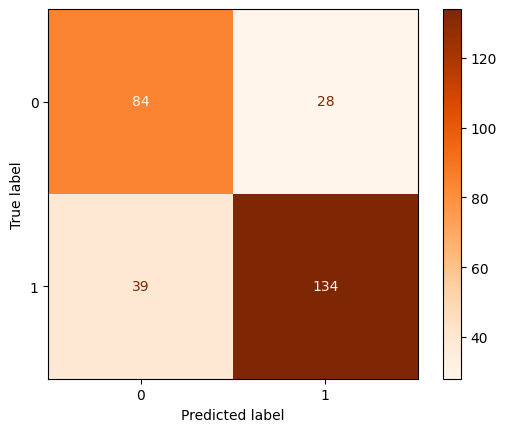

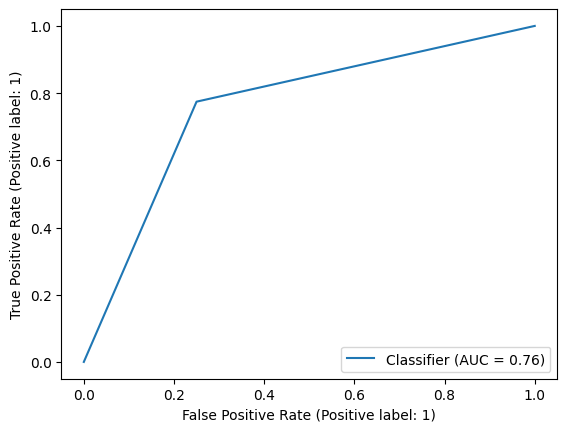

Model  2 : RandomForestClassifier()
Model Metrics:  {'Accuracy': 0.74, 'F1-Score': 0.78, 'ROC-AUC Score': 0.73, 'CV Mean': 0.72}
Classification Report: 
               precision    recall  f1-score   support

           0       0.66      0.70      0.68       112
           1       0.80      0.77      0.78       173

    accuracy                           0.74       285
   macro avg       0.73      0.73      0.73       285
weighted avg       0.74      0.74      0.74       285

Confusion Matrix for  RandomForestClassifier() 



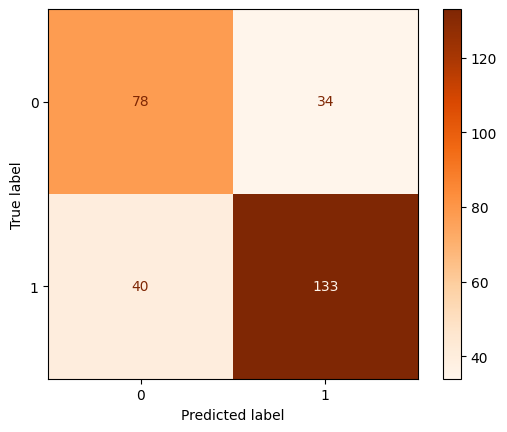

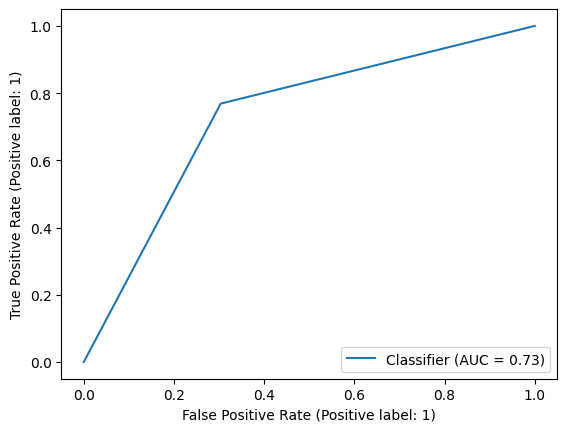

In [54]:
#iterating over models
i = 0
for model in models:
    i +=1
    print("Model ", i,":", model)
    print("Model Metrics: ", fit_predict(model))
    print("Classification Report: \n", classification_report(y_test,predictions))
    print("Confusion Matrix for ",model,"\n")
    ConfusionMatrixDisplay.from_predictions(y_test, predictions,cmap=plt.cm.Oranges , values_format='d')
    RocCurveDisplay.from_predictions(y_test, predictions)
    plt.show()

In [55]:
# defining a function
def parameter(classifier, model):
    print(model)
    print('Best Score: ' + str(round((classifier.best_score_),2)))
    print('Best Parameters: ' + str(classifier.best_params_))

#### Hyperparameter Tuning Logistic Regression Model

In [56]:
# defining a parameter grid for model hyperparameter tuning
param_grid_lr = {
    'solver' : ['liblinear'],
    'penalty' : ['l1','l2'],
    'C' : [100, 10, 1.0, 0.1, 0.01],
    'max_iter': [100, 500, 1000, 5000]
}

In [57]:
# using gridsearchcv for hyperparameter tuning with 5-fold cross-validation
clf_lr = GridSearchCV(lr_model, param_grid = param_grid_lr, cv = 5,scoring='accuracy')
# fitting the model
best_lr = clf_lr.fit(X_train,y_train)
# getting the best parameters according to the best scores
best_model_lr = clf_lr.best_estimator_

parameter(best_lr,'Logistic Regression')

Logistic Regression
Best Score: 0.75
Best Parameters: {'C': 1.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


#### Hyperparameter Tuning  Random Forest Classifier

In [58]:
# Define the parameter grid to search over
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}


In [59]:
# Perform a grid search with 5-fold cross-validation
clf_rf = GridSearchCV(rf_model, param_grid=param_grid_rf, cv=5, scoring='accuracy')

# Fit the grid search to the data
clf_rf.fit(X_train, y_train)
# Getting the best one out
best_model_rf = clf_rf.best_estimator_

parameter(clf_rf,'Random Forest Classifier')

Random Forest Classifier
Best Score: 0.76
Best Parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}


In [60]:
# defining a function
def predict(model):
    """This code is used for predictions"""
    global preds
    preds = model.predict(X_test)
    roc = roc_auc_score(y_test,preds)
    acc = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    return {"Accuracy": round(acc, 2), "F1-Score": round(f1, 2), "ROC-AUC Score": round(roc,2)}

#### Applying the best parameters to Logistic Regression model

In [61]:
# printing model accuracy,f1score and rocauc score
predict(best_model_lr)

{'Accuracy': 0.76, 'F1-Score': 0.8, 'ROC-AUC Score': 0.76}

#### Applying the best parameters to Random Forest Classifier model

In [62]:
# printing model accuracy,f1score and rocauc score
predict(best_model_rf)

{'Accuracy': 0.76, 'F1-Score': 0.8, 'ROC-AUC Score': 0.76}

## Results

The metrics of the Logistic Regression, and the Random Forest Classifier model can be seen above.

**Upon evaluating the metrics for both models following hyperparameter tuning, it has been observed that both models exhibit equivalency in all the metrics with negligible differences.However Random Forest model underwent a noticeable upgrade after hyperparameter tuning compared to Logistic Regression. It is essential to recognize that both models hold comparable significance. In order to determine which model to use, it is recommended to evaluate them based on business criteria.**

# Evaluation by Business Criteria
The company wants to correctly predict high traffic recipes 80% of the time. A suitable KPI to compare model performance to business criteria in this problem could be the precision or positive predictive value (PPV) of the model in predicting high traffic recipes. The PPV is the proportion of true positive predictions (i.e., correctly identifying a high traffic recipe) out of all positive predictions made by the model. A high PPV indicates that the model is effective in identifying recipes that will lead to high traffic, which is important for the business objective of increasing website subscriptions. A PPV of 80% or higher would meet the criteria set by the requester, as they have asked if the team can correctly predict high traffic recipes 80% of the time.
The Logistic Regression model outperforms Random Forest Classifier model in the KPI,which suggests that the logistic regression model will suit the business best.
By monitoring this KPI,the business can get a more comprehensive understanding of the effectiveness of their recipe selection strategy and make data-driven decisions to optimize their performance.

#### Logistic Regression

In [63]:
# printing model accuracy,ff1score and rocauc score and Precision score
print("Model Metrics: ", predict(best_model_lr))
pslr = round(precision_score(y_test,preds)*100)
print("Precision Score", round(pslr))

Model Metrics:  {'Accuracy': 0.76, 'F1-Score': 0.8, 'ROC-AUC Score': 0.76}
Precision Score 83


#### Random Forest Classifier

In [64]:
# printing model accuracy,f1score and rocauc score and Precision score
print("Model Metrics: ", predict(best_model_rf))
psrf = round(precision_score(y_test,preds)*100)
print("Precision Score", psrf)

Model Metrics:  {'Accuracy': 0.76, 'F1-Score': 0.8, 'ROC-AUC Score': 0.76}
Precision Score 81


The plot shows the KPI **Precision** leads in **Logistic Regression** Model while **Random Forest** falls behind.

In [65]:
# data
x = np.array(["Logistic Regression","Random Forest Classifier"])
y = np.array([pslr, psrf])

# Create horizontal bar plot
fig = go.Figure(go.Bar(
    x=y,
    y=x,
    orientation='h',
    text=y,
    textposition='auto',
    marker_color='blue'
))

# Add axis labels and title
fig.update_layout(
    title="KPI - Precision Score",
    xaxis_title="Precision Score",
    yaxis_title="Models"
)

# Show plot
fig.show()


# Recommendation

Based on the analysis conducted, it is recommended that the company implement the Logistic Regression model for the website traffic prediction task. This model has shown the best performance in terms of accuracy and precision, with an overall accuracy score of 76% and precision score of 83% while the Random forest just falls behind.Both the models show a precision over 80% but the Logistic Regression leads and thus is more valuable for the business.

To further improve the model's performance, we recommend the following steps:

1. Data: In order to improve the accuracy and precision of the results, it is recommended that the product manager provide complete data, including recipe name, time to make, and recipe cost, which is readily available on the webpage. Furthermore, to enhance the predictive power of the model, additional data pertaining to customer demographics and purchasing behavior should also be collected. This may include data related to customer age, subscription plan, and viewing history.

2. Deployment: Consider deploying the model on the cloud and use it there for increased convenience and security. However, this would require additional deployment work and cloud expertise. Alternatively, deploying the model as a web service could provide an easier and more accessible option for testing and evaluation.

3. Monitor Performance: We recommend monitoring the performance of the predictive models and updating them regularly as new data becomes available. This will help ensure that the models remain accurate and relevant over time.

In addition to the KPI mentioned earlier,the business can also monitor the following KPIs:

1. Click-through rate (CTR): This measures the percentage of users who clicked on a recipe after it was displayed on the homepage. A high CTR indicates that the recipe was interesting to users and may be worth displaying again.

2. Engagement rate: This measures the amount of time users spend on a recipe page after clicking on it. A high engagement rate indicates that the recipe was engaging and may be worth displaying again.

3. Conversion rate: This measures the percentage of users who subscribed to the website after viewing a recipe. A high conversion rate indicates that the recipe was effective in attracting and retaining users.

4. Bounce rate: This measures the percentage of users who leave the website after viewing only one page. A high bounce rate indicates that the recipe was not engaging enough to keep users on the website.

By monitoring these KPIs, businesses can get a more comprehensive understanding of the effectiveness of their recipe selection strategy and make data-driven decisions to optimize their performance.
Implementing these steps should help the company to improve the performance of the model and improve customer views, thereby increasing customer retention and revenue.